In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_df = pd.read_csv('titanic/train.csv')
titanic_df.shape

(891, 12)

In [3]:
titanic_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
721,722,0,3,"Jensen, Mr. Svend Lauritz",male,17.0,1,0,350048,7.0542,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
551,552,0,2,"Sharp, Mr. Percival James R",male,27.0,0,0,244358,26.0000,NaN,S
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q


* survived: 0 = 사망, 1 = 생존
* Pclass: 1 = 일등석, 2 = 이등석, 3 = 삼등석
* sibsp: 형제자매 또는 배우자
* parch: 부모 또는 자녀
* embarked: C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print('\n ### train 데이터 정보 ###  \n')
print(titanic_df.info())


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [10]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [6]:
titanic_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
370,371,1,1,"Harder, Mr. George Achilles",male,25.0,1,0,11765,55.4417,E50,C
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S
506,507,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26360,26.0000,NaN,S
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
844,845,0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,315090,8.6625,NaN,S


In [7]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
titanic_df.dtypes[titanic_df.dtypes == 'object'].index.tolist()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [9]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [10]:
titanic_df['Cabin'].str[:3]

0      NaN
1      C85
2      NaN
3      C12
4      NaN
      ... 
886    NaN
887    B42
888    NaN
889    C14
890    NaN
Name: Cabin, Length: 891, dtype: object

In [11]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

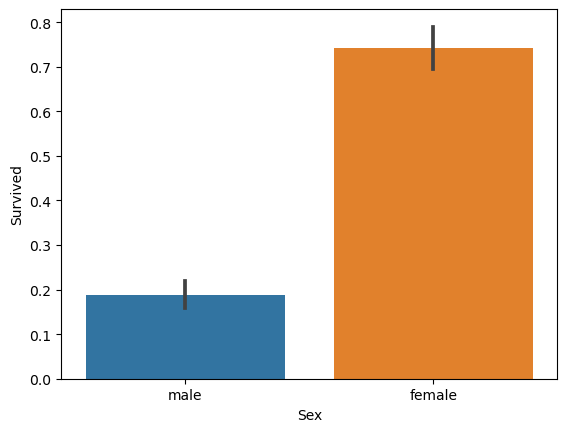

In [13]:
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

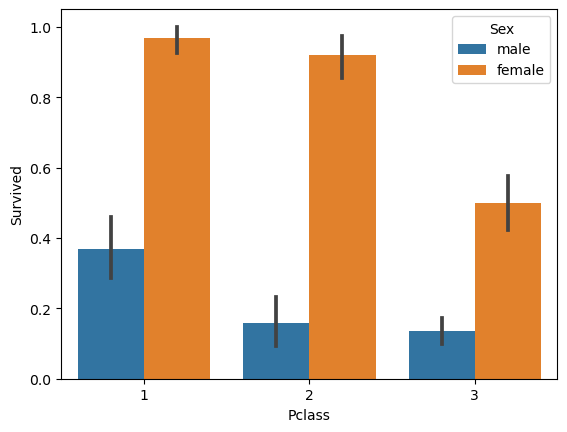

In [14]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

In [15]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
               
    return cat

In [16]:
plt.figure(figsize = (10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [17]:
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

In [18]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

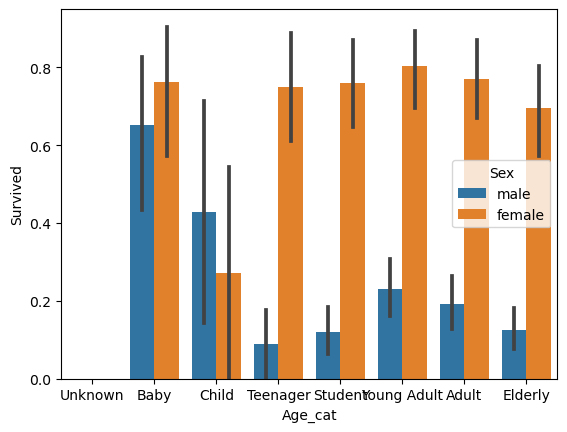

In [19]:
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = titanic_df, order = group_names)

In [20]:
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    le = LabelEncoder()
    for feature in features:
        le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2


In [23]:
titanic_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",1,18.0,0,0,A/5 3540,8.0500,147,2
203,204,0,3,"Youseff, Mr. Gerious",1,45.5,0,0,2628,7.2250,147,0
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",0,41.0,0,5,3101295,39.6875,147,2
612,613,1,3,"Murphy, Miss. Margaret Jane",0,NaN,1,0,367230,15.5000,147,1
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",0,54.0,1,3,29105,23.0000,147,2
460,461,1,1,"Anderson, Mr. Harry",1,48.0,0,0,19952,26.5500,117,2
303,304,1,2,"Keane, Miss. Nora A",0,NaN,0,0,226593,12.3500,116,1
778,779,0,3,"Kilgannon, Mr. Thomas J",1,NaN,0,0,36865,7.7375,147,1
312,313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",0,26.0,1,1,250651,26.0000,147,2
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",0,1.0,0,2,2653,15.7417,147,0


In [24]:
from sklearn.preprocessing import LabelEncoder

In [26]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True) # ----- inplace = True 원본 반영
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df

In [27]:
def drop_features(df): # ---- 불필요한 feature 제거 method
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

In [28]:
# Label Encoding 수행 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [29]:
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [31]:
titanic_df = pd.read_csv('titanic/train.csv')

In [32]:
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1, inplace = False)

In [33]:
X_titanic_df = transform_features(X_titanic_df)
X_titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 8) (179, 8) (712,) (179,)


In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [38]:
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression(solver = 'liblinear')

In [39]:
# DecisionTreeClassifier
dt_clf.fit(X_train, y_train) # ------ 학습
dt_pred = dt_clf.predict(X_test) # ------ 예측
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred))) # ------ 평가

DecisionTreeClassifier 정확도: 0.7877


In [40]:
# RandomForestClassifier
rf_clf.fit(X_train, y_train) # ------ 학습
rf_pred = rf_clf.predict(X_test) # ------ 예측
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred))) # ------ 평가

RandomForestClassifier 정확도:0.8547


In [41]:
# LogisticRegression
lr_clf.fit(X_train, y_train) # ------ 학습
lr_pred = lr_clf.predict(X_test) # ------ 예측
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred))) # ------ 평가


LogisticRegression 정확도: 0.8659


In [42]:
X_titanic_df.values[[0, 1, 2, 3, 4, 5]]

array([[ 3.        ,  1.        , 22.        ,  1.        ,  0.        ,
         7.25      ,  7.        ,  3.        ],
       [ 1.        ,  0.        , 38.        ,  1.        ,  0.        ,
        71.2833    ,  2.        ,  0.        ],
       [ 3.        ,  0.        , 26.        ,  0.        ,  0.        ,
         7.925     ,  7.        ,  3.        ],
       [ 1.        ,  0.        , 35.        ,  1.        ,  0.        ,
        53.1       ,  2.        ,  3.        ],
       [ 3.        ,  1.        , 35.        ,  0.        ,  0.        ,
         8.05      ,  7.        ,  3.        ],
       [ 3.        ,  1.        , 29.69911765,  0.        ,  0.        ,
         8.4583    ,  7.        ,  2.        ]])

In [43]:
from sklearn.model_selection import KFold

In [49]:
def exec_kfold(clf, folds = 5):
    kfold = KFold(n_splits = folds)
    scores = []
    for iter_count, (train_index, test_index), in enumerate(kfold.split(X_titanic_df)):
        print('kfold.split(X_titanic_df)',kfold.split(X_titanic_df))
        print('iter_count',iter_count)
        print('train_index',train_index)
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))   
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 

In [50]:
exec_kfold(dt_clf , folds = 5)

kfold.split(X_titanic_df) <generator object _BaseKFold.split at 0x00000249305FED60>
iter_count 0
train_index [179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340
 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358
 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376
 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394
 395 396 397 39

In [51]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv = 5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [52]:
# ----- min_samples_split 노드분할 위한 최소샘플데이터 수
# ----- min_samples_leaf 말단노드 위한 최소샘플데이터 수


from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],
             'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))


GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
